In [ ]:
!pip install pyagrum==0.17.2
!pip install simpy
!pip install qutip

     |████████████████████████████████| 4.6 MB 5.2 MB/s 
     |████████████████████████████████| 14.6 MB 13 kB/s 


Importing necessary modules

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# login into my google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# quantum-like BNs modules
qlbn_lib = drive.CreateFile( {'id' : '1CD9N8_xVUsYZas9aL8_mjPagxuasiH1M'}).GetContentFile("qlbn_core.py")
qlbn_utils_lib = drive.CreateFile( {'id' : '1H2C9CS1bXoyfsCMrlRooexwFhsBAeD_y'}).GetContentFile("qlbn_utils.py")
qlbn_viz_lib = drive.CreateFile( {'id' : '186n8A7UDUycjveQs-gmMNwdLW7V5TvD0'}).GetContentFile("qlbn_viz.py")

# classical BNs modules (Matheus work)
bn_utils_lib = drive.CreateFile( {'id' : '1XY2-GDgI5ni79yEsLKBu3d_5QZzumcC5'}).GetContentFile("bn_utils.py")
bn_lib = drive.CreateFile( {'id' : '1LdUKzLJM1GiyiX8xuYNytPVeAcJOOPxu'}).GetContentFile("bn_core.py")

# balthasar modules
wigner_lib = drive.CreateFile( {'id' : '1gdH05NYNsM1PnkMKzh1WQ4Xrf_bK-XGb'}).GetContentFile("wignerfunction.py")
striations_lib = drive.CreateFile( {'id' : '1JUK1dVIE4BJsMeGo5-hOw6KLO_8ZWJzh'}).GetContentFile("striations.py") 
mubs_lib = drive.CreateFile( {'id' : '1NJ5sStI5VPNPDFdYzkcOgd_YxHAw5eor'}).GetContentFile("mubs.py") 
lbmle_lib = drive.CreateFile( {'id' : '1SySOL0GR97KXTXXxh8NgFjUzZzPEH6EG'}).GetContentFile("lbmle.py") 
lbmle_mc_lib = drive.CreateFile( {'id' : '1QLexO-JmztZFiEllJo0ocu6sOsSTvzJ6'}).GetContentFile("lbmle_mc.py") 
latinsquare_lib = drive.CreateFile( {'id' : '1XXo0FoBGa2GPiCGr86x47ywLDmfcHryd'}).GetContentFile("latinsquare.py") 
curve_lib = drive.CreateFile( {'id' : '1EOY9NbZ-20YUUVTDPRJUHihoxZcQDPOS'}).GetContentFile("curve.py") 
coarsewignerfunction_lib = drive.CreateFile( {'id' : '1vq0b6ugBSkgagkwIvvsYjVzZsJnQzVCU'}).GetContentFile("coarsewignerfunction.py") 

# pynitefields modules
pthrootofunity_lib = drive.CreateFile( {'id' : '18Ys4fr3CwvRB-E3Jq5CMxkM8Bs5tJ0x3'}).GetContentFile("pthrootofunity.py")
galoisfield_lib = drive.CreateFile( {'id' : '1OPi2HpKgHsM8vuDV0hbGvTxsFSNHbHEm'}).GetContentFile("galoisfield.py") 
fieldelement_lib = drive.CreateFile( {'id' : '15Wtf3ZzLVwQdAjsx5sOyrvMUUcF5dhfj'}).GetContentFile("fieldelement.py") 



In [ ]:
# algebraic and numerical libs
import numpy as np
from sympy import *
import numpy.matlib as npm
from pylab import *

# tabular data manipulation
import pandas as pd

# visualisation libraries
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
from IPython.display import display, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib as mpl
from matplotlib import cm

import seaborn as sns
sns.set()

# bayesian networks libraries
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# quantum states libraries
from qutip import *

# qulbit libraries
from qlbn_core import *
from qlbn_utils import *
from qlbn_viz import *
from bn_utils import *

from pthrootofunity import *
from galoisfield import *
from fieldelement import *

# balthazar libs
from curve import *
from latinsquare import *
from lbmle_mc import *
from lbmle import *
from mubs import *
from striations import *
from wignerfunction import *

#pynitefileds libs


# other aux libs
import itertools
import os

import warnings
warnings.filterwarnings("ignore")

Using Diabetes Dataset

In [ ]:
dataset_path = "datasets/diabetes.csv"
dataset_title = "Diabetes"

MY_PATH = "/content/drive/My Drive/Colab Notebooks/QLBN/"

data = pd.read_csv(MY_PATH + dataset_path )

discr_data = discretize_dataframe( data, 6, "Diabetes")

# save discretized dataframe to file:
file_discr = MY_PATH + dataset_path.replace(".csv", "_discr.csv")
discr_data.to_csv(file_discr, index=False)
discr_data = pd.read_csv(file_discr)
discr_data

,Diabetes,times_pregnant,glucose_conc,Diastolic_BP,Triceps_thk,2_hr_insulin,BMI,Pedigree,Age
0,1,"(4.0, 7.0]","(131.0, 155.0]","(70.0, 76.0]","(33.0, 40.0]","(-0.01, 63.0]","(33.2, 35.5]","(0.59, 0.78]","(41.5, 81.0]"
1,-1,"(-0.01, 1.0]","(-0.01, 93.0]","(60.0, 66.0]","(18.0, 24.0]","(63.0, 94.0]","(25.9, 30.0]","(0.07500000000000001, 0.24]","(20.99, 22.0]"
2,1,"(-0.01, 1.0]","(131.0, 155.0]","(23.99, 60.0]","(33.0, 40.0]","(167.0, 230.0]","(39.1, 67.1]","(0.78, 2.42]","(32.0, 41.5]"
3,1,"(2.0, 4.0]","(-0.01, 93.0]","(23.99, 60.0]","(29.0, 33.0]","(63.0, 94.0]","(30.0, 33.2]","(0.24, 0.32]","(24.0, 27.0]"
4,1,"(1.0, 2.0]","(155.0, 198.0]","(66.0, 70.0]","(40.0, 63.0]","(230.0, 846.0]","(30.0, 33.2]","(0.07500000000000001, 0.24]","(41.5, 81.0]"
...,...,...,...,...,...,...,...,...,...
389,1,"(-0.01, 1.0]","(155.0, 198.0]","(82.0, 110.0]","(40.0, 63.0]","(230.0, 846.0]","(39.1, 67.1]","(0.07500000000000001, 0.24]","(24.0, 27.0]"
390,1,"(-0.01, 1.0]","(119.0, 131.0]","(82.0, 110.0]","(33.0, 40.0]","(94.0, 125.0]","(35.5, 39.1]","(0.78, 2.42]","(32.0, 41.5]"
391,-1,"(1.0, 2.0]","(-0.01, 93.0]","(23.99, 60.0]","(24.0, 29.0]","(-0.01, 63.0]","(25.9, 30.0]","(0.59, 0.78]","(20.99, 22.0]"
392,-1,"(7.0, 17.0]","(93.0, 103.0]","(70.0, 76.0]","(40.0, 63.0]","(167.0, 230.0]","(30.0, 33.2]","(0.07500000000000001, 0.24]","(41.5, 81.0]"


Compute the Classical Bayesian Networks

In [ ]:
learner = gum.BNLearner(file_discr )
learner.useMIIC()
bn = learner.learnBN()
bn

(gum::BayesNet<double>@0x560a4e6a1000) BN{nodes: 9, arcs: 6, domainSize: 10^6.44706, dim: 156}

In [ ]:
# Get the nodes
nodes = bn.names()
gnb.sideBySide(bn, bn.cpt(bn.idFromName(nodes[0])), bn.cpt(bn.idFromName(nodes[1])))

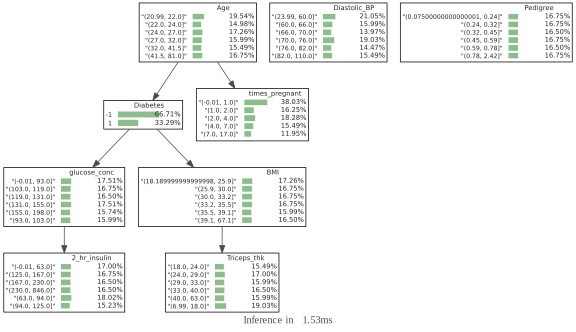

In [ ]:
inference = gum.LazyPropagation(bn)
gnb.showInference(bn,inference)

None,None
Quantum state Diabetes,Quantum state BMI


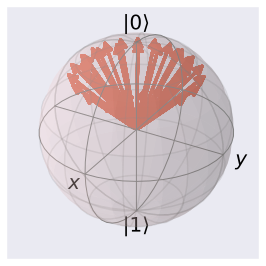

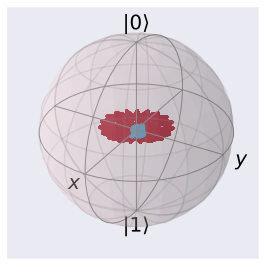

In [ ]:
#Visualising quantum states of Diabetes and BMI
b1 = visualiseQuantumState(bn, "Diabetes", dataset_title, MY_PATH , col = [plt.cm.RdBu(55)], save=False, size = (3.5,3.5))
b2 = visualiseQuantumState(bn, "BMI", dataset_title, MY_PATH , col = [plt.cm.RdBu(20), plt.cm.RdBu(200)], save=False, size = (3.5, 3.5))
gnb.sideBySide(b1.show(), b2.show(), captions=["Quantum state Diabetes", "Quantum state BMI"])


In [ ]:
#Compute the Full Joint Distribution
classical_joint = computeFullJoint(bn, var="Diabetes")
#Compute the superposition states
quantum_superposition = createSuperpositionState( classical_joint )
gnb.sideBySide(classical_joint, quantum_superposition[:], captions=["Classical Full Joint", "Quantum Superposition"])

In [ ]:
def my_density( superposition ):
  density = np.zeros((2,2), dtype=complex)
  for i in range(0, 2):
    for j in range(0, 2):

      real = superposition[:][0][i].real * superposition[:][0][j].real
      imaginary = superposition[:][0][i].imag + conj(superposition[:][0][j]).imag
    
      density[i][j] = complex(real, imaginary)

  return Qobj(density)

In [ ]:
rho = my_density(quantum_superposition)
gnb.sideBySide(classical_joint, 
               pd.DataFrame(rho[:], columns=["Diabetes", "BMI"]),
               pd.DataFrame(np.expand_dims(np.real(np.diag(rho[:])),0), columns=["Diabetes,BMI"]),
               captions=["Classical Full Joint Distribution",
                         "Quantum Density Operator",
                         "Classical Full Joint Distribution from Density Operator"])

IndexError: ignored

In [ ]:
var_name = "Diabetes"

# claasical inference
ie=gum.LazyPropagation(bn)
ie.makeInference()

quantum_marginal_distr = computePartialTrace( rho[:], [0,1], axis = bn.idFromName(var_name) )
classical_marginal_distr = ie.posterior( var_name )

gnb.sideBySide(classical_marginal_distr, 
               pd.DataFrame(quantum_marginal_distr[:], columns=["Diabetes", "BMI"]),
               pd.DataFrame(np.expand_dims(np.diag(quantum_marginal_distr[:]),0), columns=["Diabetes", "BMI"]),
               captions=["Classical Marginal Distribution",
                         "Quantum Partial Trace over %s" %(var_name),
                         "Classical Marginal Distribution from partial trace"])

ValueError: ignored